In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dfCity=pd.read_csv("innercity.csv")
dfCity.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [4]:
dfCity.shape # high level understanding

(21613, 23)

In [5]:
dfCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [6]:
# find out the unique value to make categorical variable
print('Bed Rooms')
print(*list(dfCity.room_bed.unique()))
print('Bath Rooms')
print(*list(dfCity.room_bath.unique()))
print('Coast')
print(*list(dfCity.coast.unique()))
print('sight')
print(*list(dfCity.sight.unique()))
print('condition')
print(*list(dfCity.condition.unique()))
print('quality')
print(*list(dfCity.quality.unique()))
print('basemnet')
print(*list(dfCity.basement.unique()))
print('furnished')
print(*list(dfCity.furnished.unique()))

Bed Rooms
4 3 2 5 6 1 8 33 7 0 9 10 11
Bath Rooms
3.25 2.5 1.0 1.5 1.75 2.0 2.75 2.25 3.0 4.0 4.5 3.5 5.25 4.75 4.25 5.0 7.75 3.75 0.75 5.5 6.75 1.25 6.25 0.0 5.75 6.0 0.5 6.5 7.5 8.0
Coast
0 1
sight
0 2 4 3 1
condition
5 3 4 2 1
quality
9 8 6 7 10 11 5 13 12 4 3 1
basemnet
0 800 880 1200 620 1720 540 500 720 390 1800 810 830 700 470 300 960 1450 1570 1600 770 270 160 710 1590 750 890 350 570 920 430 1100 550 940 690 840 590 190 760 900 260 100 630 2120 580 740 400 380 530 1000 435 520 290 1060 490 1070 150 480 120 460 1150 980 140 600 440 660 1030 1050 560 1540 1220 1430 1750 650 200 780 1180 1080 1350 1290 670 850 340 1460 60 280 330 1260 240 250 360 1950 310 1420 790 1440 210 1250 180 1010 640 1210 730 680 1140 1510 990 170 320 80 1390 2010 910 870 1380 130 860 1120 930 1090 1410 1400 1520 4820 420 1110 1170 820 1330 1340 2850 1020 2220 1790 1280 220 1270 1230 2030 90 230 450 1490 1300 1370 2550 1310 1500 1760 370 950 145 1040 1610 510 1160 1320 1130 1830 2060 1190 970 1580 610 1780

In [7]:
dfCity[dfCity.room_bed==33] # to analysis the outlier whether the row will be removed or only 33 value will be replaced

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
750,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,0,7620


In [8]:
# to take the years_sold from dayhours colums
dfCity['yr_sold']=dfCity['dayhours'].apply(lambda x:x[:4]).astype(int)
dfCity.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2015
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,2014
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,2015


In [9]:
# create feature (new column)
dfCity['age_sold']=dfCity.yr_sold-dfCity.yr_built
dfCity.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,age_sold
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,58
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,38
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,9
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,98133,47.7049,-122.349,1520,3844,0,4664,2014,98
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,98115,47.6768,-122.269,1900,5940,0,5450,2015,61


In [10]:
# Total number of rows and columns
dfCity.shape
#(21613, 23)
# Rows containing duplicate data
duplicate_rows_df = dfCity[dfCity.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 25)


In [11]:
##we have certain features that are displayed as integer, but we know that we need to fix them into categories
dfCity.coast=pd.Categorical(dfCity.coast)
dfCity.condition=pd.Categorical(dfCity.condition)
dfCity.quality=pd.Categorical(dfCity.quality)
dfCity.furnished=pd.Categorical(dfCity.furnished)
dfCity.sight=pd.Categorical(dfCity.sight)

In [12]:
dfCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cid               21613 non-null  int64   
 1   dayhours          21613 non-null  object  
 2   price             21613 non-null  int64   
 3   room_bed          21613 non-null  int64   
 4   room_bath         21613 non-null  float64 
 5   living_measure    21613 non-null  int64   
 6   lot_measure       21613 non-null  int64   
 7   ceil              21613 non-null  float64 
 8   coast             21613 non-null  category
 9   sight             21613 non-null  category
 10  condition         21613 non-null  category
 11  quality           21613 non-null  category
 12  ceil_measure      21613 non-null  int64   
 13  basement          21613 non-null  int64   
 14  yr_built          21613 non-null  int64   
 15  yr_renovated      21613 non-null  int64   
 16  zipcode           2161

In [13]:
dfCity.describe().T #only display numeric cloumn also
#dfCity.describe(include='all').T #include non-numeric cloumn also

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
ceil_measure,21613.0,1.788391e+03,8.280910e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
basement,21613.0,2.915090e+02,4.425750e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03
yr_built,21613.0,1.971005e+03,2.937341e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03


In [14]:
#we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# Analysis on Room_Bed feature
Q1=dfCity.room_bed.quantile(.25)
Q3=dfCity.room_bed.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",dfCity.room_bed.min())
print("Max Value ",dfCity.room_bed.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 0
Max Value  33
Q1  3.0
Q3  4.0
IQR  1.0
lower_limit 1.5
upper_limit 5.5


In [15]:
## Analysis of continous variables
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

In [16]:
findoutliers(dfCity.room_bed)

array([ 6,  6,  6,  6,  1,  1,  6,  6,  8,  1,  1,  1,  6,  1, 33,  6,  1,
        1,  6,  1,  6,  6,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,  8,  6,
        1,  1,  6,  1,  1,  6,  0,  6,  8,  9,  6,  7,  6,  6,  6,  0,  6,
        1,  6,  1,  1,  1,  7,  6,  6,  6,  8,  1,  6,  8,  6,  1,  6,  1,
        6,  1,  6,  6,  7,  6,  1,  1,  6,  6,  6,  1,  6,  1,  1,  6,  6,
        6,  6,  7,  8,  1,  6,  1,  6,  6,  6,  6,  6,  6,  6,  6,  1,  1,
        6,  6,  6,  1,  6,  6,  6,  1,  1,  6,  1,  6,  1,  6,  6,  6,  6,
        8,  1,  6,  6,  6,  6,  1,  7,  1,  6,  1,  6,  6,  6,  6,  1, 10,
        6,  6,  1,  6,  6,  6,  1,  6,  6,  6,  1,  6,  6,  1,  7,  6,  1,
        1,  6,  7,  6,  6,  1,  6,  1,  1,  1,  6,  6,  6,  6,  6,  6,  6,
        1,  6,  7,  6,  6,  1,  7,  6,  7,  1,  6,  7,  1,  1,  1,  0,  6,
        9,  7,  6,  6,  6,  6,  8,  1,  0,  6,  6,  1,  1,  6,  1,  1,  1,
        6,  6,  1,  6,  1,  1,  7,  6,  1,  1,  6,  6,  1,  6,  1,  6,  6,
        7,  6,  6,  6,  6

In [17]:
print(len(findoutliers(dfCity.room_bed))) #no of rows having outlier

546


In [18]:
print(len(findoutliers(dfCity.room_bath)))

571


In [19]:
print(len(findoutliers(dfCity.living_measure)))

572


<AxesSubplot:>

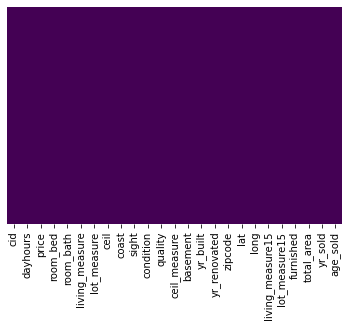

In [20]:
# to check missing value
sn.heatmap(dfCity.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<AxesSubplot:>

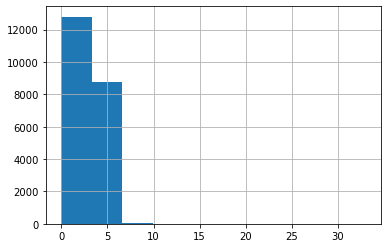

In [21]:
dfCity.room_bed.hist()

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axes[0,0].set_title('Box-room bed')
axes[0,1].set_title('DistributionPlot-room bed')
axes[1,0].set_title('Box-Living measure')
axes[1,1].set_title('DistributionPlot--Living measure')

sn.boxplot(dfCity.room_bed, orient='v',ax=axes[0,0])
sn.distplot(dfCity.room_bed,ax=axes[0,1]) 
sn.boxplot(dfCity.living_measure, orient='v',ax=axes[1,0])
sn.distplot(dfCity.living_measure,ax=axes[1,1]) 

fig.tight_layout();  # this reduces the space in between the subplots

<AxesSubplot:>

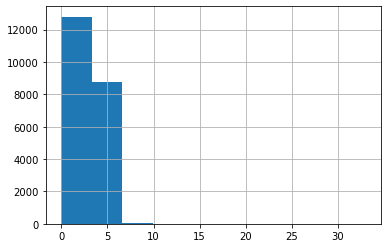

In [23]:
dfCity.room_bed.hist()

# Caegorical Variable Analysis

In [24]:
dfCity.coast.value_counts()

0    21450
1      163
Name: coast, dtype: int64

In [25]:
# in percentage
dfCity.coast.value_counts(normalize=True)
# that means 99.25% of houses have a coast and 0.75% have coast

0    0.992458
1    0.007542
Name: coast, dtype: float64

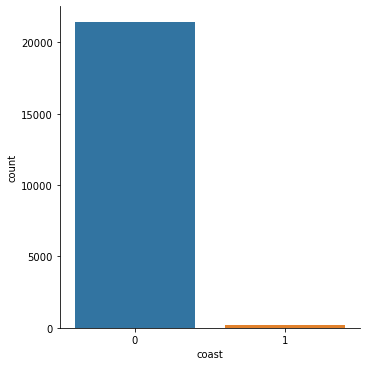

In [26]:
sn.factorplot('coast',data=dfCity,kind='count')

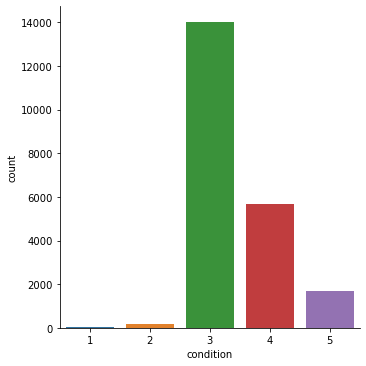

In [27]:
sn.factorplot('condition',data=dfCity,kind='count')

In [28]:
dfCity.condition.value_counts()
# since condition 1&2 the count is less then we can merge these 2 into 1 column same 4 & 5 is also combined 
#that way we can reduced the level of condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [29]:
dfCity.quality.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

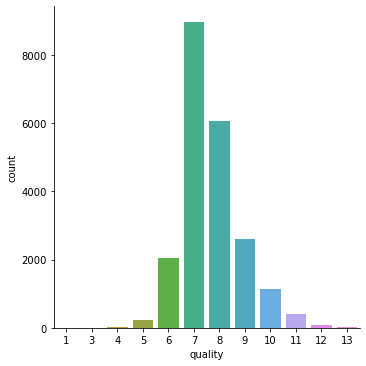

In [30]:
sn.factorplot('quality',data=dfCity,kind='count')
# so here 0-5 merged into a level, and 10-13 also merged into another level

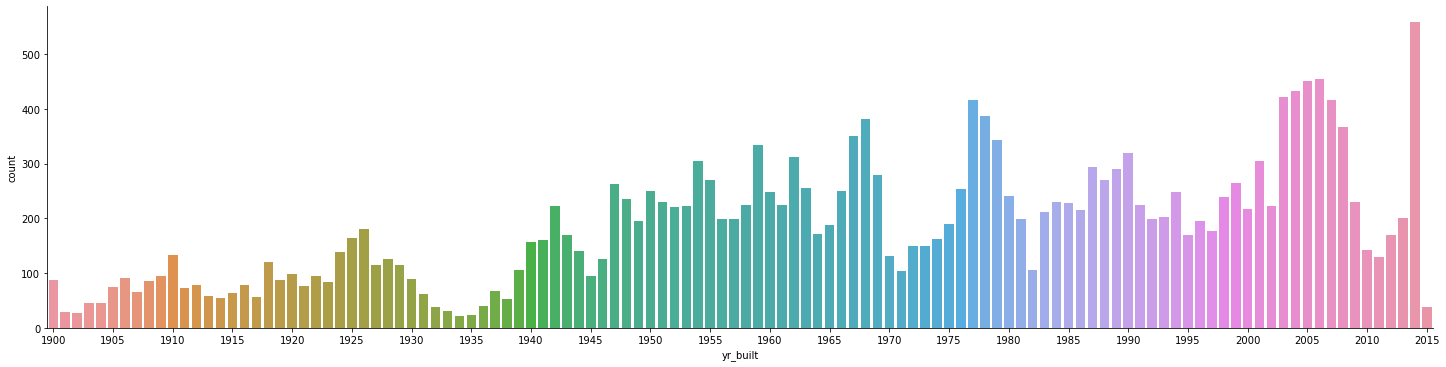

In [31]:
pl = sn.factorplot('yr_built',data=dfCity, aspect=4,kind='count')
pl.set_xticklabels(step=5)

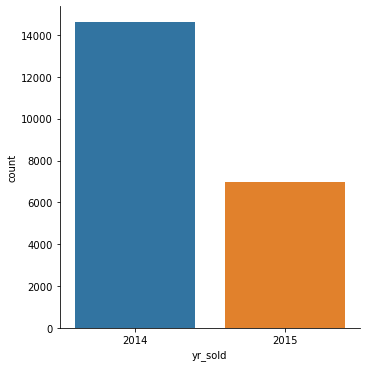

In [32]:
sn.factorplot('yr_sold',data=dfCity,kind='count')

# Bivariate Analysis

In [ ]:
corr=dfCity.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')
# one variable influenced by other variable
# here linving measure and living measure15 are highly co-related so we can use any one of the column

<AxesSubplot:>